In [1]:
#Usual Imports
import os
import sys
import time
import glob
import datetime
import sqlite3
import numpy as np
import pandas as pd


In [28]:
# path to the Million Song Subset (Uncompressed)
msd_subset_path = 'MillionSongSubset'
msd_subset_data_path =os.path.join(msd_subset_path, "data")
msd_subset_addf_path=os.path.join(msd_subset_path,"additionalfiles")
assert os.path.isdir(msd_subset_path), "wrong path"# sanity check
assert os.path.isdir(msd_subset_data_path), "wrong path"# sanity check
assert os.path.isdir(msd_subset_addf_path), "wrong path"# sanity check
msd_code_path="MSongsDB"
assert os.path.isdir(msd_code_path), "wrong path"
sys.path.append(os.path.join(msd_code_path,"PythonSrc"))

In [27]:
# imports specific to the MSD
import hdf5_getters as GETTERS

In [17]:
def strtimedelta(starttime,stoptime):
    return str(datetime.timedelta(seconds=stoptime-starttime))

In [18]:
def apply_to_all_files(basedir,func=lambda x: x,ext='.h5'):
    count=0
    for root,dirs,files in os.walk(basedir):
        count+=len(files)
        for f in files:
            func(f)
    return count
print ("number of song files:",apply_to_all_files(msd_subset_data_path))

number of song files: 10000


In [29]:
all_artist_names = set()

def func_to_get_artist_name(filename):
    h5=GETTERS.open_h5_file_read(filename)
    artist_name=GETTERS.get_artist_name(h5)
    all_artist_names.add(artist_name)
    h5.close()

t1=time.time()
apply_to_all_files(msd_subset_data_path,func=func_to_get_artist_name)
t2=time.time()
print("all artist names extracted in:", strtimedelta(t1,t2))
print("found",len(all_artist_names),"unique artist names")

OSError: ``TRAAAAW128F429D538.h5`` does not exist

In [31]:
file_loc = os.path.join(msd_subset_data_path,"A/A/A/TRAAAAW128F429D538.h5")
assert os.path.isfile(file_loc)

In [37]:
conn = sqlite3.connect(os.path.join(msd_subset_addf_path,"subset_track_metadata.db"))
q = "SELECT DISTINCT artist_name FROM songs"
t1= time.time()
res = conn.execute(q)
all_artist_names_sqlite=res.fetchall()
t2=time.time()
print("all artist names extracted (SQLite) in: ", strtimedelta(t1,t2))
conn.close()
for k in range(0,5):
    print (all_artist_names_sqlite[k][0])

all artist names extracted (SQLite) in:  0:00:00.008506
!!!
(hed) p.e.
089 Clique feat. Minnesota Snipe & Skinny Cueball
089 Clique feat. Prophet
1. Futurologischer Congress


In [44]:
conn = sqlite3.connect(os.path.join(msd_subset_addf_path,"subset_track_metadata.db"))

q="SELECT DISTINCT artist_id FROM songs"
res=conn.execute(q)
all_artist_ids = map(lambda x: x[0],res.fetchall())
conn.close()
for k in range(4):
    print(all_artist_ids[k])

TypeError: 'map' object is not subscriptable

In [52]:
#Import the song data from SQL
conn = sqlite3.connect(os.path.join(msd_subset_addf_path,"subset_track_metadata.db"))
q= "SELECT * FROM songs"
song_data=pd.read_sql(q, conn)
conn.close()
song_data.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,TRACCVZ128F4291A8A,Deep Sea Creature,SOVLGJY12A8C13FBED,Call of the Mastodon,ARMQHX71187B9890D3,bc5e2ad6-0a4a-4d90-b911-e9a7e6861727,Mastodon,280.21506,0.780462,0.574275,2001
1,TRACCMH128F428E4CD,No Quieras Marcharte,SOGDQZK12A8C13F37C,Adelante,AR2PT4M1187FB55B1A,d54ea4a6-0b9c-4e47-bed0-289ae9ff4037,Los Chichos,191.68608,0.561590,0.420570,1984
2,TRACCSW128F148C7C3,If I...,SODMVJR12A6D4F985D,Ill Na Na,ARDI88R1187B98DAB2,fd87374e-ffde-4d36-89a8-8a073f795666,Foxy Brown,222.92853,0.687687,0.406686,0
3,TRACCXJ128F428F0CF,Werther - Lyric Drama in four Acts/Act I/Alors...,SOIWBDR12A8C13A4AC,Massenet: Werther,ARUKJUP12086C14589,8a5f2736-bcde-4a2e-8d50-72631d66a7ef,Ramón Vargas;Vladimir Jurowski,278.38649,0.391741,0.291265,0
4,TRACCVS12903D014F8,Ad Te Clamamus Exsvles Mortva Liberi,SOHCCIA12AC907577F,Pentagrammaton,ARZEWUR1187FB53DC8,0be59867-0da4-4e45-9b64-728cdf25487c,Enthroned,89.15546,0.593416,0.395710,2010


In [53]:
len(song_data)

10000

In [55]:
#Subset the useful columns
song_useful = song_data[["title","release","artist_id","artist_name","duration", "artist_familiarity","artist_hotttnesss","year"]]

In [56]:
song_useful.head(15)

,title,release,artist_id,artist_name,duration,artist_familiarity,artist_hotttnesss,year
0,Deep Sea Creature,Call of the Mastodon,ARMQHX71187B9890D3,Mastodon,280.21506,0.780462,0.574275,2001
1,No Quieras Marcharte,Adelante,AR2PT4M1187FB55B1A,Los Chichos,191.68608,0.561590,0.420570,1984
2,If I...,Ill Na Na,ARDI88R1187B98DAB2,Foxy Brown,222.92853,0.687687,0.406686,0
3,Werther - Lyric Drama in four Acts/Act I/Alors...,Massenet: Werther,ARUKJUP12086C14589,Ramón Vargas;Vladimir Jurowski,278.38649,0.391741,0.291265,0
4,Ad Te Clamamus Exsvles Mortva Liberi,Pentagrammaton,ARZEWUR1187FB53DC8,Enthroned,89.15546,0.593416,0.395710,2010
5,Murder One,BTNHRESURRECTION,ARUZRFN1187B98AC05,Bone Thugs-N-Harmony,255.73832,0.815923,0.555138,2000
6,On My Feet Again,Utopia,ARHBWOZ1187FB3FD53,Utopia,239.59465,0.543937,0.430300,0
7,Bedroom Acoustics,Plug In Baby,ARR3ONV1187B9A2F59,Muse,156.96934,0.929030,0.750427,0
8,Segredo,Joao Voz E Violato,AR3THYK1187B999F1F,João Gilberto,197.19791,0.645192,0.471224,2000
9,Sajana (Ft Faheem Mazhar),The Lost Souls Bonus EP,ARFELOH1187B991F95,Niraj Chag,262.58240,0.495819,0.342765,0


In [81]:
# Find the 10 most common artists
popular_artists = song_useful.groupby(["artist_id","artist_name"]).size()
popular_artists.order(ascending=False).head(10)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


artist_id           artist_name              
AROIHOI122988FEB8E  Mario Rosenstock             13
ARIRD6J1187FB5A98C  Sugar Minott                 12
AR9W3X91187FB3994C  Phil Collins                 12
AR12F2S1187FB56EEF  Aerosmith                    12
AREWQSE1187B9AEC6C  The Jackson Southernaires    12
ARH6W4X1187B99274F  Radiohead                    11
AR78ZID1187B9B31ED  Mikey Dread                  11
ARODBRG1187FB3FD99  Nick Cave & The Bad Seeds    11
ARJIE2Y1187B994AB7  Line Renaud                  11
ARVN9FZ1187FB393F1  Snow Patrol                  11
dtype: int64

In [84]:
#rank the artists by "hotttnesss"
hot_artists = song_useful.groupby(["artist_id","artist_name", "artist_hotttnesss"]).size()
hotness_data=hot_artists.reset_index().sort("artist_hotttnesss",ascending=False)
hotness_data.head(30)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,artist_id,artist_name,artist_hotttnesss,0
3413,ARRH63Y1187FB47783,Kanye West,1.082503,6
3414,ARRH63Y1187FB47783,Kanye West / Adam Levine,1.082503,1
3415,ARRH63Y1187FB47783,Kanye West / Consequence / Cam'Ron,1.082503,1
3416,ARRH63Y1187FB47783,Kanye West / Lupe Fiasco,1.082503,1
1800,ARF8HTQ1187B9AE693,Daft Punk,1.021256,1
3670,ARTDQRC1187FB4EFD4,Black Eyed Peas / Terry Dexter,1.005942,1
3669,ARTDQRC1187FB4EFD4,Black Eyed Peas / Les Nubians / Mos Def,1.005942,1
3668,ARTDQRC1187FB4EFD4,Black Eyed Peas,1.005942,3
3505,ARS54I31187FB46721,Taylor Swift,0.922412,1
2311,ARJ7KF01187B98D717,Coldplay,0.916053,6


In [85]:
import matplotlib.pyplot as plt

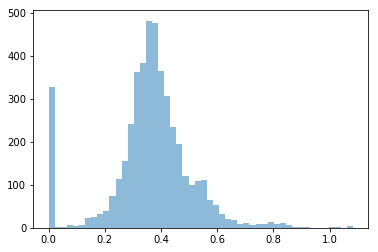

In [86]:
#hotttnesss distribution
plt.hist(hotness_data["artist_hotttnesss"],bins=50, alpha=0.5)
plt.show()

In [92]:
years =  song_useful.groupby(["year"]).size()
years.reset_index().tail(10)
#plt.hist(years,bins=100)
#plt.show()
#Lots of rows with no year and the most recent is only 2010

,year,0
59,2001,217
60,2002,198
61,2003,254
62,2004,270
63,2005,304
64,2006,320
65,2007,285
66,2008,253
67,2009,250
68,2010,64


In [93]:
years[0]

5320